In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib_inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
from kmodes.kprototypes import KPrototypes


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [31]:
store_data2 =pd.read_csv("/Users/ds_learner__22/Desktop/Unsupervised project/Superstore_crit.csv")
store_data2.head(2)

,Row ID,Order ID,Oyears,Odays,Omonths,Order Date,SYear,SMonth,SDays,Ship Date,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016,8,11,11/8/2016,2016,11,11,11/11/2016,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914
1,2,CA-2016-152156,2016,8,11,11/8/2016,2016,11,11,11/11/2016,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.000,219.582


In [32]:
store_data2.columns

Index(['Row ID', 'Order ID', 'Oyears', 'Odays', 'Omonths', 'Order Date',
       'SYear', 'SMonth', 'SDays', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [33]:
store_data2_new=store_data2.drop(columns=['Row ID','Country','Postal Code','Order ID','Order Date','Ship Date'], inplace=False)
store_data2_new.head(1)

,Oyears,Odays,Omonths,SYear,SMonth,SDays,Ship Mode,Customer ID,Customer Name,Segment,...,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016,8,11,2016,11,11,Second Class,CG-12520,Claire Gute,Consumer,...,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914


In [34]:
#let's check the missing values
store_data2_new.isnull().sum()

Oyears           0
Odays            0
Omonths          0
SYear            0
SMonth           0
SDays            0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [35]:
# let's look at the distribution of numerical values
store_data2_new.describe()

,Oyears,Odays,Omonths,SYear,SMonth,SDays,Sales,Quantity,Discount,Profit
count,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000
mean,2015.722,15.468,7.810,2015.737,7.743,15.884,229.858,3.790,0.156,28.657
std,1.124,8.748,3.285,1.126,3.340,8.803,623.245,2.225,0.206,234.260
min,2014.000,1.000,1.000,2014.000,1.000,1.000,0.444,1.000,0.000,-6599.978
25%,2015.000,8.000,5.000,2015.000,5.000,8.000,17.280,2.000,0.000,1.729
50%,2016.000,15.000,9.000,2016.000,9.000,16.000,54.490,3.000,0.200,8.666
75%,2017.000,23.000,11.000,2017.000,11.000,24.000,209.940,5.000,0.200,29.364
max,2017.000,31.000,12.000,2018.000,12.000,31.000,22638.480,14.000,0.800,8399.976


In [36]:
first_prod_dataset=store_data2_new.drop(columns=['Oyears', 'Odays', 'Omonths','SYear', 'SMonth', 'SDays', 'Ship Mode', 'Customer ID','Customer Name'], inplace=False)
first_prod_dataset.head(1)

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914


In [37]:
# The dimension of data
print('Dimension data: {} rows and {} columns'.format(len(first_prod_dataset), len(first_prod_dataset.columns)))
# Print the first 5 rows
first_prod_dataset.head(2)

Dimension data: 9994 rows and 12 columns


,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914
1,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.000,219.582


In [38]:
# Inspect the data type
first_prod_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   object 
 1   City          9994 non-null   object 
 2   State         9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Product ID    9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Product Name  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [39]:
# let's look at the distribution of numerical values
first_prod_dataset.describe()

,Sales,Quantity,Discount,Profit
count,9994.000,9994.000,9994.000,9994.000
mean,229.858,3.790,0.156,28.657
std,623.245,2.225,0.206,234.260
min,0.444,1.000,0.000,-6599.978
25%,17.280,2.000,0.000,1.729
50%,54.490,3.000,0.200,8.666
75%,209.940,5.000,0.200,29.364
max,22638.480,14.000,0.800,8399.976


In [40]:
#let's check if there is any abnormal values in  the categorical variables:
first_prod_dataset_cat=first_prod_dataset[['Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]

for i in first_prod_dataset_cat.columns:
    print(first_prod_dataset_cat[i].unique())

['Consumer' 'Corporate' 'Home Office']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'A

In [41]:
first_prod_dataset_cat

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...,...,...,...
9989,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle
9990,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...
9991,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone
9992,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5"""


In [42]:
#transform categorical labels to numerical labels
first_prod_dataset_cat=first_prod_dataset[['Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]

encoders={}
for col_name in first_prod_dataset_cat.columns:
    series = first_prod_dataset_cat[col_name]
    label_encoder = LabelEncoder()
    first_prod_dataset_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/982706783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
first_prod_dataset_cat

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,0,194,15,2,12,0,4,386
1,0,194,15,2,55,0,5,839
2,1,266,3,3,946,1,10,1433
3,0,153,8,2,319,0,16,366
4,0,153,8,2,1316,1,14,573
...,...,...,...,...,...,...,...,...
9989,0,295,8,2,200,0,9,1586
9990,0,104,3,3,164,0,9,1535
9991,0,104,3,3,1816,2,13,47
9992,0,104,3,3,1247,1,12,929


In [44]:
#let's check if there is any abnormal values in  the categorical variables:
first_prod_dataset_num=first_prod_dataset[['Sales','Discount','Quantity','Profit']]
first_prod_dataset_num

,Sales,Discount,Quantity,Profit
0,261.960,0.000,2,41.914
1,731.940,0.000,3,219.582
2,14.620,0.000,2,6.871
3,957.577,0.450,5,-383.031
4,22.368,0.200,2,2.516
...,...,...,...,...
9989,25.248,0.200,3,4.103
9990,91.960,0.000,2,15.633
9991,258.576,0.200,2,19.393
9992,29.600,0.000,4,13.320


In [45]:
#concatenate the data
first_prod_dataset_new=pd.concat([first_prod_dataset_cat,first_prod_dataset_num], axis=1)
first_prod_dataset_new

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit
0,0,194,15,2,12,0,4,386,261.960,0.000,2,41.914
1,0,194,15,2,55,0,5,839,731.940,0.000,3,219.582
2,1,266,3,3,946,1,10,1433,14.620,0.000,2,6.871
3,0,153,8,2,319,0,16,366,957.577,0.450,5,-383.031
4,0,153,8,2,1316,1,14,573,22.368,0.200,2,2.516
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,295,8,2,200,0,9,1586,25.248,0.200,3,4.103
9990,0,104,3,3,164,0,9,1535,91.960,0.000,2,15.633
9991,0,104,3,3,1816,2,13,47,258.576,0.200,2,19.393
9992,0,104,3,3,1247,1,12,929,29.600,0.000,4,13.320


In [46]:
# optional: standardize the numerical features
scaler = StandardScaler()
first_prod_dataset_new_scaled = scaler.fit_transform(first_prod_dataset_new)
first_prod_dataset_new_scaled

array([[-0.86416091, -0.6177269 , -0.47363803, ..., -0.75664349,
        -0.8043034 ,  0.05659251],
       [-0.86416091, -0.6177269 , -0.47363803, ..., -0.75664349,
        -0.35486486,  0.81505408],
       [ 0.44716981, -0.10030313, -1.24764007, ..., -0.75664349,
        -0.8043034 , -0.09300169],
       ...,
       [-0.86416091, -1.2645066 , -1.24764007, ...,  0.21215332,
        -0.8043034 , -0.03954647],
       [-0.86416091, -1.2645066 , -1.24764007, ..., -0.75664349,
         0.09457367, -0.06547279],
       [-0.86416091,  1.70349361, -1.24764007, ..., -0.75664349,
        -0.8043034 ,  0.18907752]])

In [47]:
#Load Data
pca = PCA()

#Transform the data
d_f= pca.fit_transform(first_prod_dataset_new_scaled)
 
d_f.shape

(9994, 12)

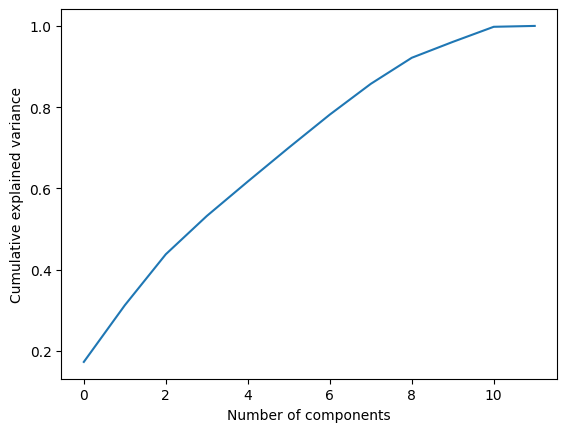

In [48]:
# Plot the cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [49]:
#Load Data
pca = PCA(5)

#Transform the data
first_d_f= pca.fit_transform(first_prod_dataset_new_scaled)
 
first_d_f.shape

(9994, 5)

In [50]:
#decode categorical data because k-prototype works with raw categorical data
for i in first_prod_dataset_cat.columns:
     first_prod_dataset_new[i]=first_prod_dataset_new[i].astype(int)
for col_name in first_prod_dataset_cat.columns:
    first_prod_dataset_new[col_name] = encoders[col_name].inverse_transform(first_prod_dataset_new[col_name])

In [51]:
first_prod_dataset_new.head(2)

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit
0,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,0.000,2,41.914
1,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,0.000,3,219.582


In [52]:
# Get the position of categorical columns
catColumnsPos = [first_prod_dataset_new.columns.get_loc(col) for col in list(first_prod_dataset_new.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(first_prod_dataset_new.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7]


In [53]:
# Convert dataframe to matrix
first_prod_dataset_new_Matrix = first_prod_dataset_new.to_numpy()
first_prod_dataset_new_Matrix

array([['Consumer', 'Henderson', 'Kentucky', ..., 0.0, 2, 41.9136],
       ['Consumer', 'Henderson', 'Kentucky', ..., 0.0, 3, 219.582],
       ['Corporate', 'Los Angeles', 'California', ..., 0.0, 2, 6.8714],
       ...,
       ['Consumer', 'Costa Mesa', 'California', ..., 0.2, 2, 19.3932],
       ['Consumer', 'Costa Mesa', 'California', ..., 0.0, 4, 13.32],
       ['Consumer', 'Westminster', 'California', ..., 0.0, 2, 72.948]],
      dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6


<function matplotlib.pyplot.show(close=None, block=None)>

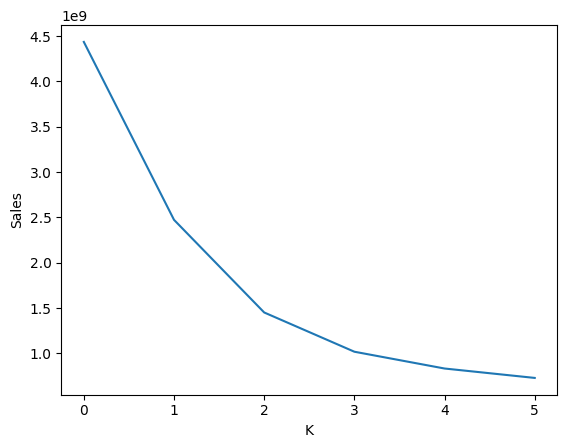

In [54]:
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

Sales = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(first_prod_dataset_new_Matrix, categorical = catColumnsPos)
        Sales.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(Sales)
plt.xlabel('K')
plt.ylabel('Sales')
plt.show

In [55]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,7), 
        y=Sales, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


In [56]:
#let's build the Kprototype model with 3 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
first_prod_dataset_new['clusters']= kprototype.fit_predict(first_prod_dataset_new_Matrix, categorical = catColumnsPos)


In [57]:
kprototype

KPrototypes(gamma=107.4867182662819, init='Huang', n_clusters=3, n_jobs=-1,
            random_state=0)

In [58]:
#predict the labels of clusters.
first_label = kprototype.fit_predict(first_prod_dataset_new_Matrix, categorical = catColumnsPos)
print(first_label)

[2 2 2 ... 2 2 2]


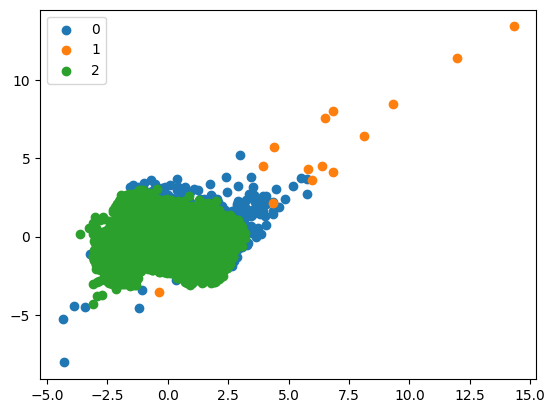

In [59]:
#Getting unique labels
first_u_labels = np.unique(first_label)
#plotting the results:
 
for i in first_u_labels:
    plt.scatter(first_d_f[first_label == i , 0] , first_d_f[first_label == i , 1], label = i)
plt.legend()
plt.show()

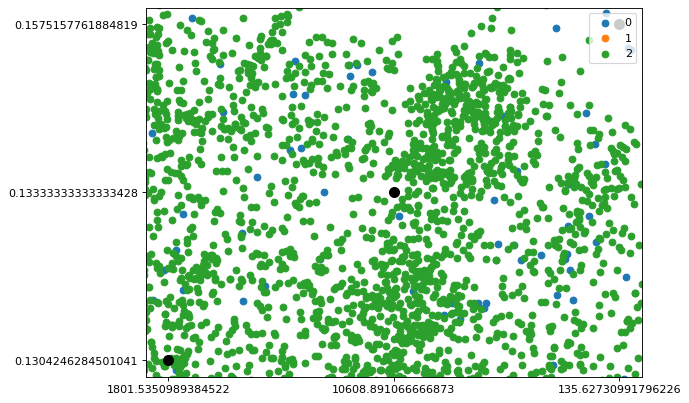

In [60]:
#Getting the Centroids of each cluster
from matplotlib.pyplot import figure

centroids = kprototype.cluster_centroids_
u_labels = np.unique(first_label)
figure(figsize=(8, 6), dpi=80)

#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[first_label == i , 0] , d_f[first_label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

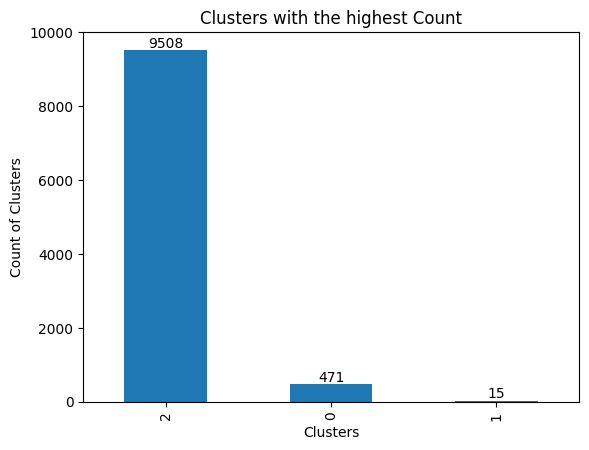

In [61]:
#the volume of each cluster
ax=first_prod_dataset_new['clusters'].value_counts().plot(kind='bar')
plt.ylim(0,10000)
# add values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
#addlabels(x,y)

# add title and axis labels
plt.title('Clusters with the highest Count')
plt.xlabel('Clusters')
plt.ylabel('Count of Clusters')

# show the plot
plt.show()

In [62]:
#stats of numerical data by mean
first_prod_dataset_new.groupby(['clusters']).mean()

,Sales,Discount,Quantity,Profit
clusters,,,,
0,1801.535,0.130,5.887,246.482
1,10608.891,0.133,5.467,2578.443
2,135.627,0.158,3.683,13.844


In [63]:
#stats of categorical data by mode
first_prod_dataset_new.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]


,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
clusters,,,,,,,,
0,Consumer,New York City,California,West,OFF-BI-10001359,Technology,Chairs,Fellowes PB500 Electric Punch Plastic Comb Bin...
1,Consumer,New York City,New York,East,TEC-CO-10004722,Technology,Machines,Canon imageCLASS 2200 Advanced Copier
2,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope


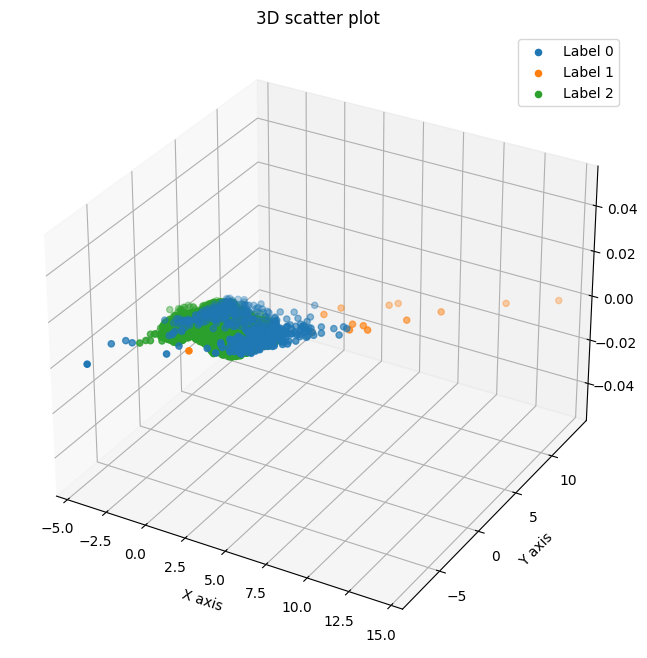

In [64]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(d_f[first_label == i, 0],d_f[first_label == i, 1], label=f"Label {i}")

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

ax.set_title('3D scatter plot')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


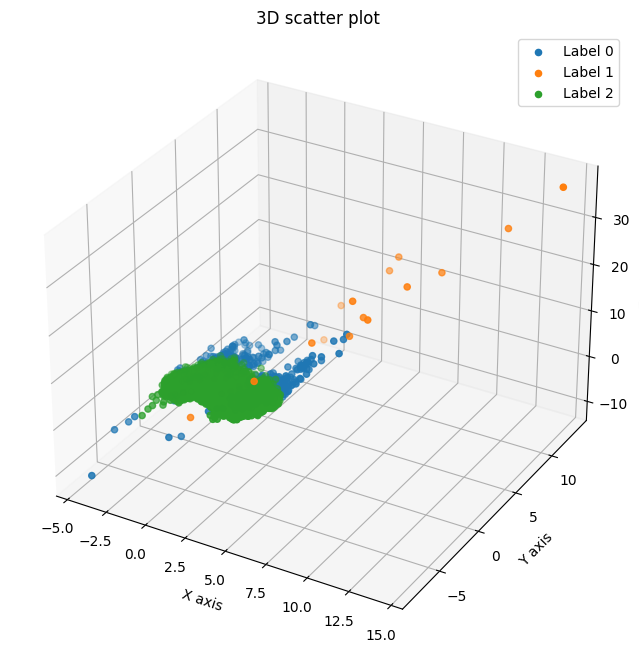

In [65]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(d_f[first_label == i, 0],d_f[first_label == i, 1],d_f[first_label == i, 2],label=f"Label {i}")

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D scatter plot')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.



In [66]:
 #transform categorical labels to numerical labels
first_prod_dataset_new_num=first_prod_dataset_new[['Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name','Sales','Discount','Quantity','Profit']]

encoders={}
for col_name in first_prod_dataset_new_num.columns:
    series = first_prod_dataset_new_num[col_name]
    label_encoder = LabelEncoder()
    first_prod_dataset_new_num[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/943262016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
first_prod_dataset_new_num

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit
0,0,194,15,2,12,0,4,386,4205,0,1,5740
1,0,194,15,2,55,0,5,839,5219,0,2,6962
2,1,266,3,3,946,1,10,1433,969,0,1,3301
3,0,153,8,2,319,0,16,366,5392,7,4,75
4,0,153,8,2,1316,1,14,573,1360,3,1,2257
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,295,8,2,200,0,9,1586,1482,3,2,2684
9990,0,104,3,3,164,0,9,1535,3029,0,1,4467
9991,0,104,3,3,1816,2,13,47,4193,3,1,4766
9992,0,104,3,3,1247,1,12,929,1644,0,3,4244


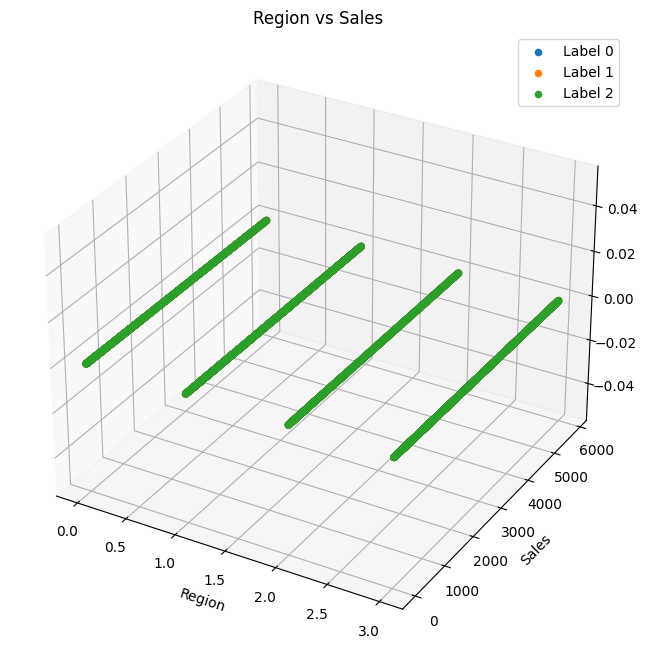

In [68]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(first_prod_dataset_new_num['Region'],first_prod_dataset_new_num['Sales'], label=f"Label {i}")

ax.set_xlabel('Region')
ax.set_ylabel('Sales')

ax.set_title('Region vs Sales')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


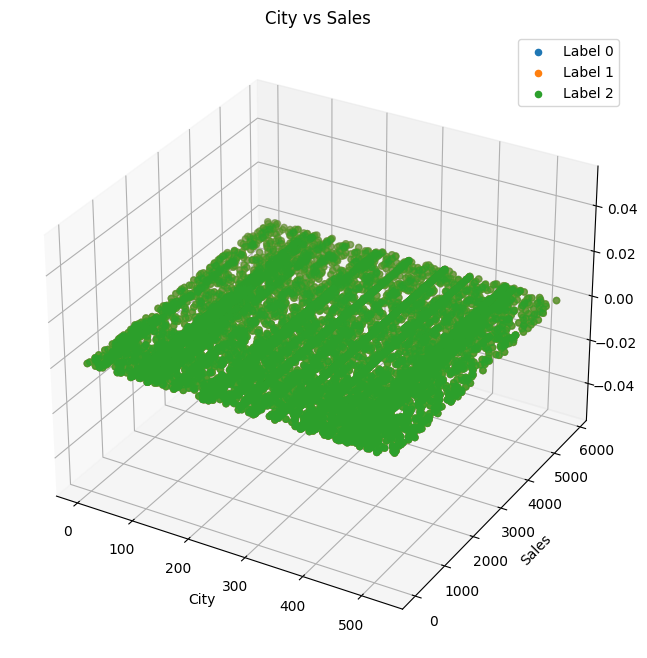

In [69]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(first_prod_dataset_new_num['City'],first_prod_dataset_new_num['Sales'], label=f"Label {i}")

ax.set_xlabel('City')
ax.set_ylabel('Sales')

ax.set_title('City vs Sales')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


#### Our product
###  Penpower WorldCard Pro Card Scanner

In [70]:
First_product = 'Space Solutions Commercial Steel Shelving'
First_product_dataset = first_prod_dataset_new[first_prod_dataset_new['Product Name'] == First_product]
First_product_dataset

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit,clusters
660,Consumer,Arlington,Texas,Central,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,724.080,0.200,14,-135.765,2
2921,Consumer,San Francisco,California,West,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.300,0.000,2,6.465,2
3400,Corporate,Richmond,Kentucky,South,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,193.950,0.000,3,9.697,2
4589,Home Office,Danville,California,West,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,452.550,0.000,7,22.628,2
8430,Consumer,Apple Valley,Minnesota,Central,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.300,0.000,2,6.465,2
9663,Consumer,San Francisco,California,West,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,193.950,0.000,3,9.697,2
9827,Corporate,New York City,New York,East,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.300,0.000,2,6.465,2


In [71]:
 #transform categorical labels to numerical labels
First_product_dataset_num=First_product_dataset[['Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]

encoders={}
for col_name in First_product_dataset_num.columns:
    series = First_product_dataset_num[col_name]
    label_encoder = LabelEncoder()
    First_product_dataset_num[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/3238466660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
First_product_dataset_num

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
660,0,1,4,0,0,0,0,0
2921,0,5,0,3,0,0,0,0
3400,1,4,1,2,0,0,0,0
4589,2,2,0,3,0,0,0,0
8430,0,0,2,0,0,0,0,0
9663,0,5,0,3,0,0,0,0
9827,1,3,3,1,0,0,0,0


In [73]:
first_prod_dataset_num

,Sales,Discount,Quantity,Profit
0,261.960,0.000,2,41.914
1,731.940,0.000,3,219.582
2,14.620,0.000,2,6.871
3,957.577,0.450,5,-383.031
4,22.368,0.200,2,2.516
...,...,...,...,...
9989,25.248,0.200,3,4.103
9990,91.960,0.000,2,15.633
9991,258.576,0.200,2,19.393
9992,29.600,0.000,4,13.320


In [74]:
#concatenate the data
first_prod_dataset_new222=pd.concat([First_product_dataset_num,first_prod_dataset_num], axis=1)
first_prod_dataset_new222

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit
660,0.000,1.000,4.000,0.000,0.000,0.000,0.000,0.000,724.080,0.200,14,-135.765
2921,0.000,5.000,0.000,3.000,0.000,0.000,0.000,0.000,129.300,0.000,2,6.465
3400,1.000,4.000,1.000,2.000,0.000,0.000,0.000,0.000,193.950,0.000,3,9.697
4589,2.000,2.000,0.000,3.000,0.000,0.000,0.000,0.000,452.550,0.000,7,22.628
8430,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,129.300,0.000,2,6.465
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.248,0.200,3,4.103
9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.960,0.000,2,15.633
9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.576,0.200,2,19.393
9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.600,0.000,4,13.320


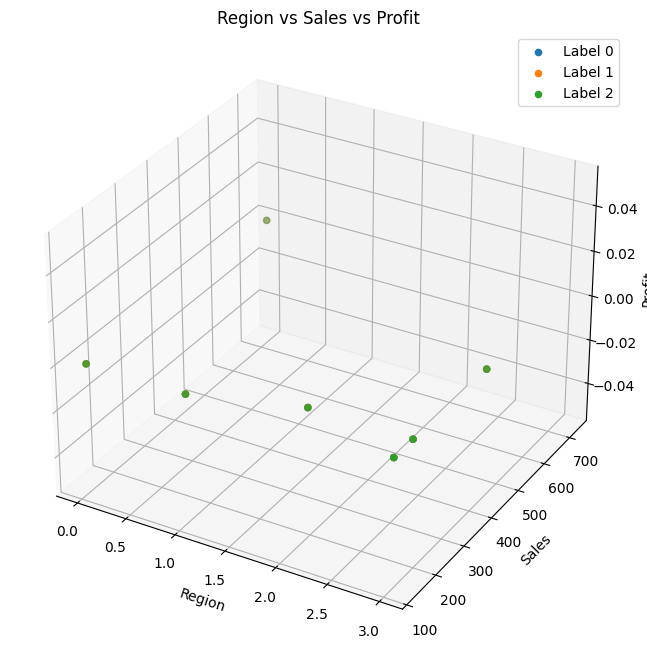

In [75]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(first_prod_dataset_new222['Region'],first_prod_dataset_new222['Sales'], label=f"Label {i}")

ax.set_xlabel('Region')
ax.set_ylabel('Sales')
ax.set_zlabel('Profit')
ax.set_title('Region vs Sales vs Profit')
ax.legend()
#plt.xlim(1,6)
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


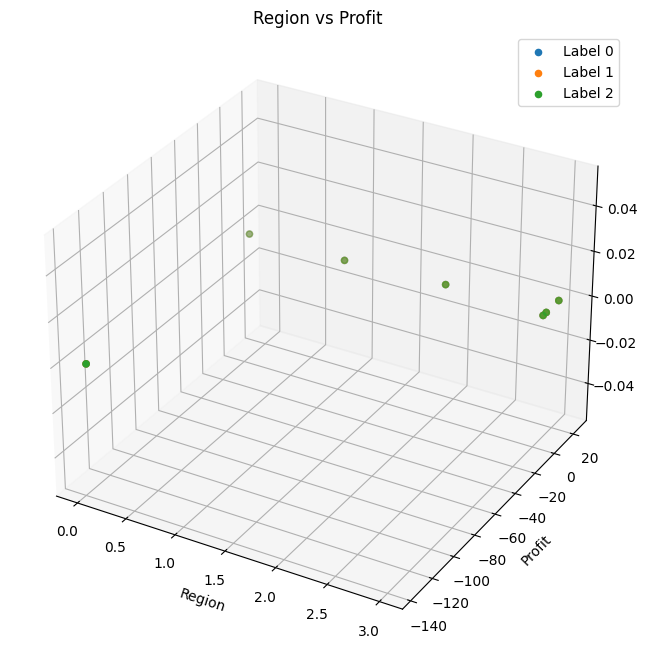

In [76]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(first_prod_dataset_new222['Region'],first_prod_dataset_new222['Profit'], label=f"Label {i}")

ax.set_xlabel('Region')
ax.set_ylabel('Profit')

ax.set_title('Region vs Profit')
ax.legend()
# plt.ylim(1,6)
# plt.ylim(1,6)
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/693578836.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


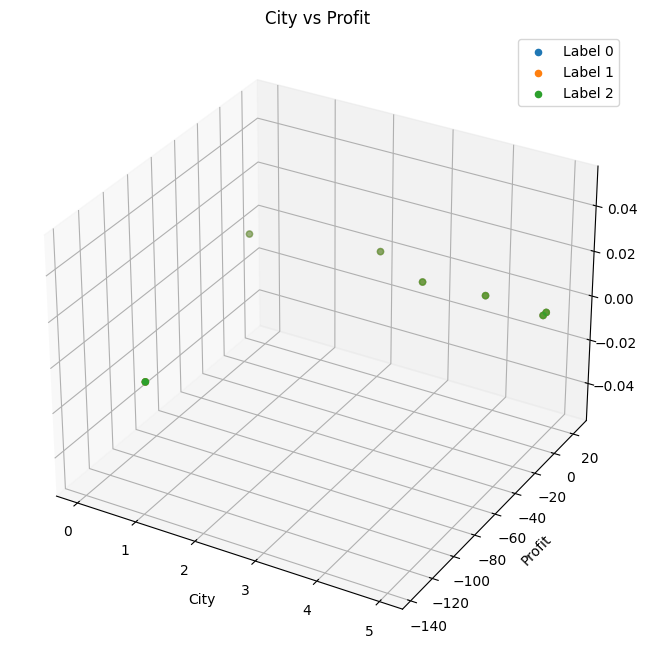

In [77]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(first_prod_dataset_new222['City'],first_prod_dataset_new222['Profit'], label=f"Label {i}", cmap = 'gray')

ax.set_xlabel('City')
ax.set_ylabel('Profit')

ax.set_title('City vs Profit')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


#### OUR SECOND PRODUCT
#### NEW PROPOSED
#### ELECTRIC TABLE

In [78]:
Second_product = 'Space Solutions Commercial Steel Shelving'
Second_product_category ="Furniture"
Second_product_Sub_Category = 'Tables'
Second_product_dataset = first_prod_dataset_new[first_prod_dataset_new['Category'] == Second_product_category]# & first_prod_dataset_new[first_prod_dataset_new['Sub-Category'] == Second_product_Sub_Category] 
Second_product_dataset

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit,clusters
0,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,0.000,2,41.914,2
1,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,0.000,3,219.582,2
3,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577,0.450,5,-383.031,2
5,Consumer,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,0.000,7,14.169,2
10,Consumer,Los Angeles,California,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,0.200,9,85.309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,Home Office,Houston,Texas,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.466,0.320,4,-67.670,2
9964,Corporate,Newark,Delaware,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.400,0.000,1,6.432,2
9980,Consumer,Lafayette,Louisiana,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,0.000,1,22.355,2
9989,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,0.200,3,4.103,2


In [79]:
 #transform categorical labels to numerical labels
Second_product_dataset_num=Second_product_dataset[['Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]

encoders={}
for col_name in Second_product_dataset_num.columns:
    series = Second_product_dataset_num[col_name]
    label_encoder = LabelEncoder()
    Second_product_dataset_num[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/619949614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [80]:
Second_product_dataset_num

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,0,137,15,2,12,0,0,52
1,0,137,15,2,55,0,1,225
3,0,108,8,2,319,0,3,38
5,0,184,3,3,185,0,2,129
10,0,184,3,3,328,0,3,65
...,...,...,...,...,...,...,...,...
9962,2,146,40,0,40,0,0,49
9964,1,233,6,1,232,0,2,141
9980,0,160,16,2,323,0,3,257
9989,0,206,8,2,200,0,2,375


In [81]:
#transform categorical labels to numerical labels
Second_product_dataset_num1=Second_product_dataset[['Sales','Discount','Quantity','Profit']]
Second_product_dataset_num1

,Sales,Discount,Quantity,Profit
0,261.960,0.000,2,41.914
1,731.940,0.000,3,219.582
3,957.577,0.450,5,-383.031
5,48.860,0.000,7,14.169
10,1706.184,0.200,9,85.309
...,...,...,...,...
9962,383.466,0.320,4,-67.670
9964,13.400,0.000,1,6.432
9980,85.980,0.000,1,22.355
9989,25.248,0.200,3,4.103


In [82]:
#concatenate the data
second_prod_dataset_new222=pd.concat([Second_product_dataset_num,Second_product_dataset_num1], axis=1)
second_prod_dataset_new222

,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Quantity,Profit
0,0,137,15,2,12,0,0,52,261.960,0.000,2,41.914
1,0,137,15,2,55,0,1,225,731.940,0.000,3,219.582
3,0,108,8,2,319,0,3,38,957.577,0.450,5,-383.031
5,0,184,3,3,185,0,2,129,48.860,0.000,7,14.169
10,0,184,3,3,328,0,3,65,1706.184,0.200,9,85.309
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,2,146,40,0,40,0,0,49,383.466,0.320,4,-67.670
9964,1,233,6,1,232,0,2,141,13.400,0.000,1,6.432
9980,0,160,16,2,323,0,3,257,85.980,0.000,1,22.355
9989,0,206,8,2,200,0,2,375,25.248,0.200,3,4.103


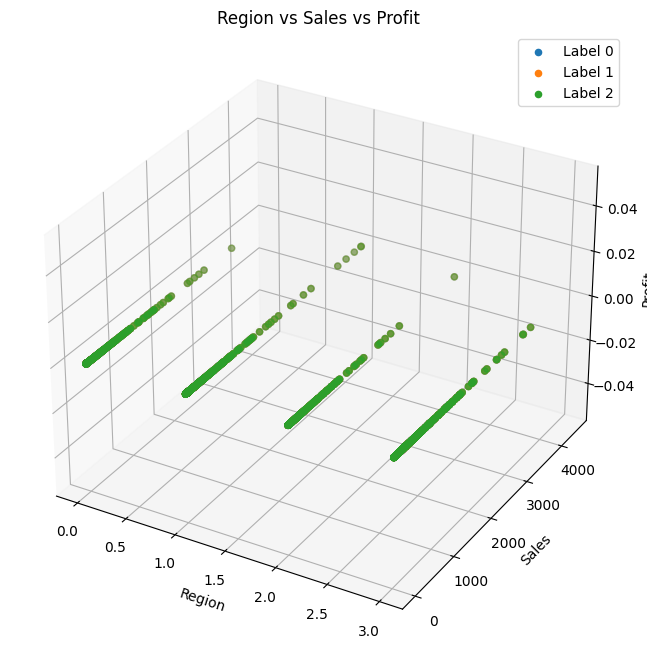

In [83]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(second_prod_dataset_new222['Region'],second_prod_dataset_new222['Sales'], label=f"Label {i}")

ax.set_xlabel('Region')
ax.set_ylabel('Sales')
ax.set_zlabel('Profit')
ax.set_title('Region vs Sales vs Profit')
ax.legend()
#plt.xlim(1,6)
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


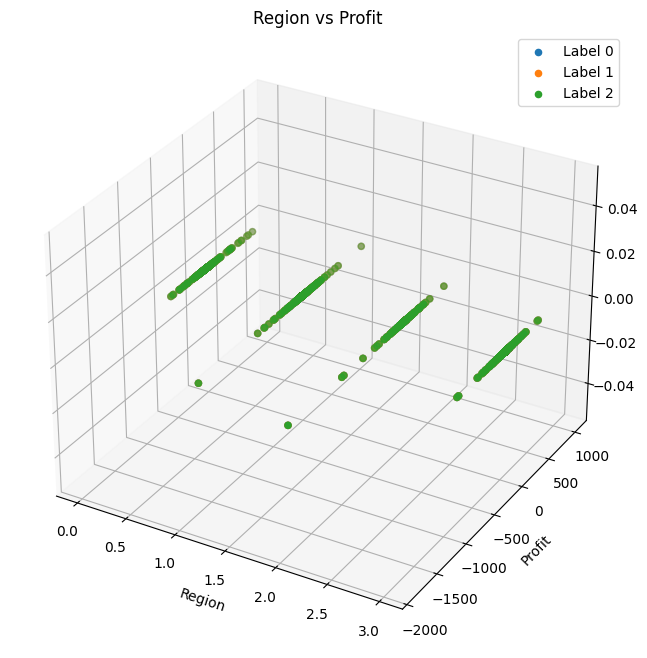

In [84]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(second_prod_dataset_new222['Region'],second_prod_dataset_new222['Profit'], label=f"Label {i}")

ax.set_xlabel('Region')
ax.set_ylabel('Profit')

ax.set_title('Region vs Profit')
ax.legend()
# plt.ylim(1,6)
# plt.ylim(1,6)
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


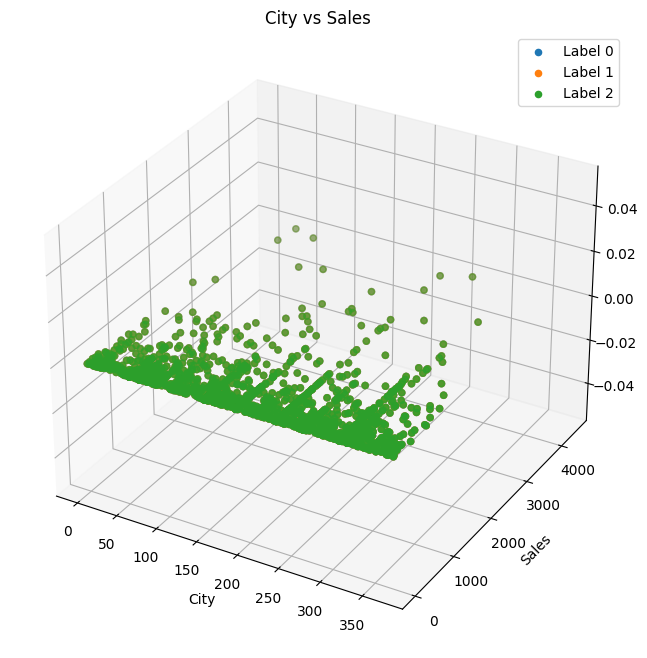

In [85]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(second_prod_dataset_new222['City'],second_prod_dataset_new222['Sales'], label=f"Label {i}")

ax.set_xlabel('City')
ax.set_ylabel('Sales')

ax.set_title('City vs Sales')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/4237497978.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


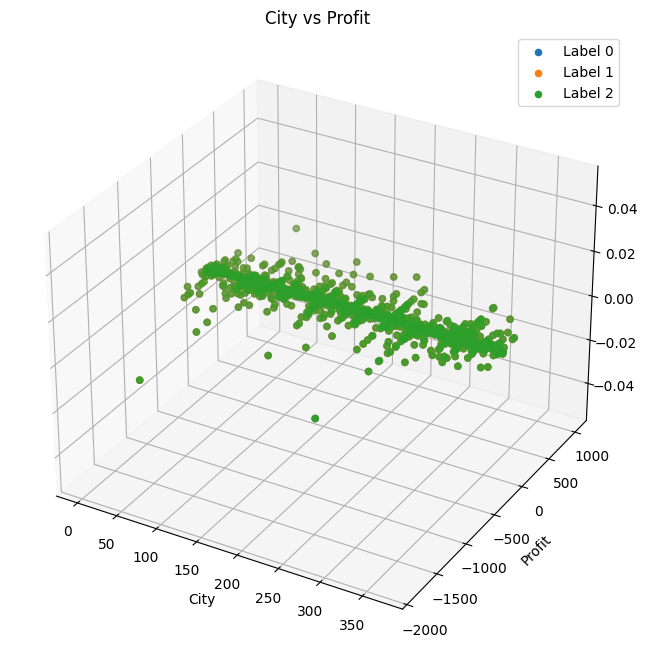

In [86]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(second_prod_dataset_new222['City'],second_prod_dataset_new222['Profit'], label=f"Label {i}", cmap = 'gray')

ax.set_xlabel('City')
ax.set_ylabel('Profit')

ax.set_title('City vs Profit')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/4237497978.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


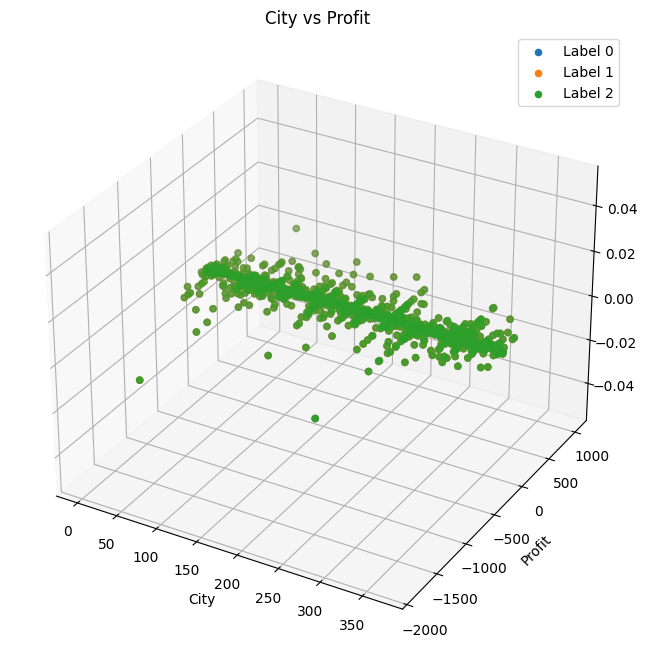

In [87]:
# Assuming that `d_f` is a 3D data array and `label` is the label array
#u_labels = np.unique(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in u_labels:
    ax.scatter(second_prod_dataset_new222['City'],second_prod_dataset_new222['Profit'], label=f"Label {i}", cmap = 'gray')

ax.set_xlabel('City')
ax.set_ylabel('Profit')

ax.set_title('City vs Profit')
ax.legend()
plt.show()
#In this code, the fig object is used to create a figure with a 3D axis using projection='3d'. The ax object is used to add scatter plots for each unique label in the label array. The ax.set_xlabel(), ax.set_ylabel(), and ax.set_zlabel() methods are used to set the labels for the x, y, and z axes, respectively. Finally, the ax.legend() method is used to add a legend to the plot.
